<a href="https://colab.research.google.com/github/Joannana/python-practice/blob/master/SF_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SF crime data analysis and modeling

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from ggplot import *
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:

import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/sf_03_18.csv")
dbutils.fs.mv("file:/tmp/sf_03_18.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))

# https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD


path,name,size
dbfs:/laioffer/spark_hw1/data/sf_03_18.csv,sf_03_18.csv,463094961


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"
# use this file name later

In [0]:
# read data from the data storage
# please upload your data into databricks community at first. 
crime_data_lines = sc.textFile(data_path)
#prepare data 
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
#get header
header = df_crimes.first()
print(header)

#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

#get the first line of data
#display(crimes.take(3))

#get the total number of data 
print(crimes.count())


['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId']
2215024

### Solove  big data issues via Spark
approach 1: use RDD 
approach 2: use Dataframe, register the RDD to a dataframe
approach 3: use SQL  
***note***: you only need to choose one of approaches as introduced above

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,05/15/2018,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.41191202732877,37.77520656149669,POINT (-122.41191202732877 37.77520656149669),18036228907023
180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,05/15/2018,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.41925789481357,37.77514629165388,POINT (-122.41925789481357 37.77514629165388),18036094864020
180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087926150
180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087965010
180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087965015
180360829,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,05/15/2018,01:27,MISSION,NONE,700 Block of SHOTWELL ST,-122.41561725232026,37.75641376904809,POINT (-122.41561725232026 37.75641376904809),18036082965016
180360835,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,05/15/2018,01:25,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.41004163181597,37.781953653725715,POINT (-122.41004163181597 37.781953653725715),18036083503074
180360835,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Tuesday,05/15/2018,01:25,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.41004163181597,37.781953653725715,POINT (-122.41004163181597 37.781953653725715),18036083516710
180360794,LIQUOR LAWS,MISCELLANEOUS LIQOUR LAW VIOLATION,Tuesday,05/15/2018,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.44776112231955,37.76984648754153,POINT (-122.44776112231955 37.76984648754153),18036079417030
180360794,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,05/15/2018,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.44776112231955,37.76984648754153,POINT (-122.44776112231955 37.76984648754153),18036079462050


#### Q1 question (OLAP): 
#####Write a Spark program that counts the number of crimes for different category.

Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data. You can follow this example to finish other questions.

In [0]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [0]:
#Spark SQL based
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


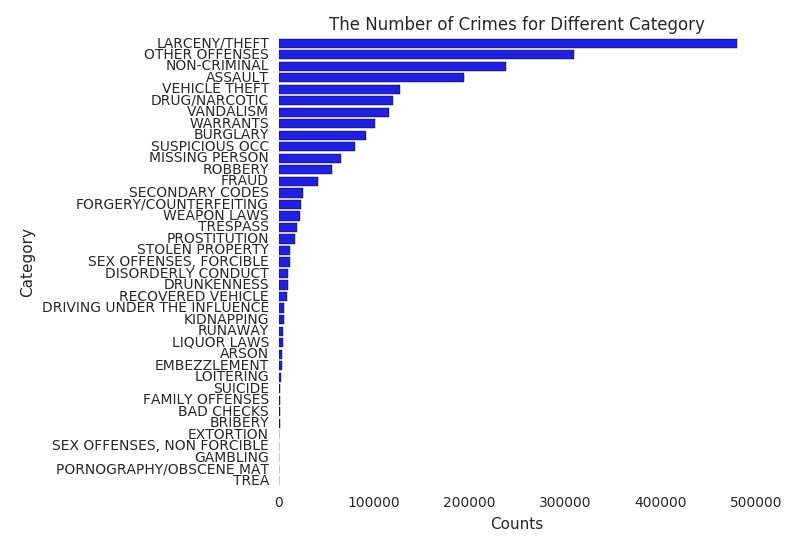

In [0]:
# important hints: 
## first step: spark df or sql to compute the statisitc result 
## second step: export your result to a pandas dataframe. 
crimes_pd_df = crimeCategory.toPandas()
fig,axes = plt.subplots(1,1)
sb.barplot(y="category",x = "Count", color = "blue", data = crimes_pd_df, ax=axes)
plt.xlabel("Counts")
plt.ylabel("Category")
plt.title("The Number of Crimes for Different Category")
plt.tight_layout()
display(fig.show())
# Spark does not support this function, please refer https://matplotlib.org/ for visuliation. You need to use display to show the figure in the databricks community. 



#### Q2 question (OLAP)
Counts the number of crimes for different district, and visualize your results

In [0]:
q2_result = df_opt1.groupBy('PdDistrict').count().orderBy('count', ascending=False)
display(q2_result)

PdDistrict,count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


In [0]:
# Spark SQL Based
crimeDistrict = spark.sql("SELECT PdDistrict, COUNT (*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(crimeDistrict)

PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


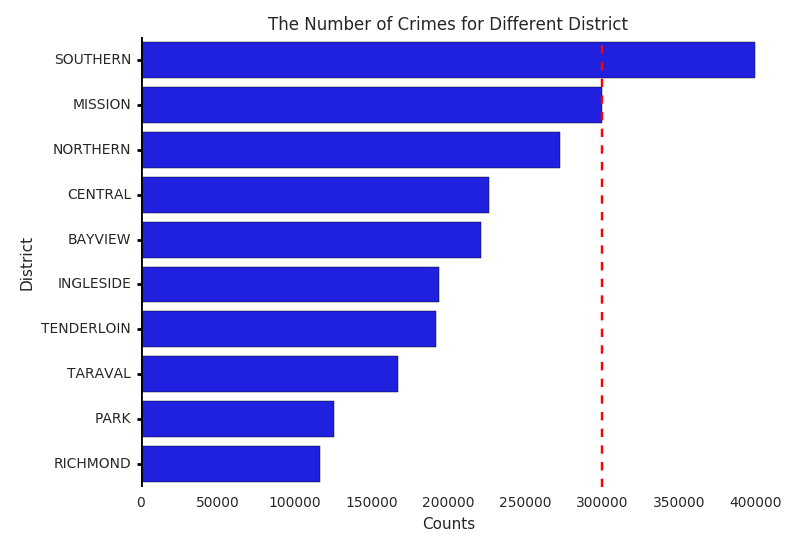

In [0]:
crime_district_df = crimeDistrict.toPandas()
fig,axes = plt.subplots(1,1)
sb.barplot(y="PdDistrict",x = "Count", color = "blue", data = crime_district_df, ax=axes)
plt.xlabel("Counts")
plt.ylabel("District")
plt.title("The Number of Crimes for Different District")
plt.tick_params(axis = "both", direction = 'inout', length = 6, width = 2, color = 'black',top = 'off', right = 'off', bottom = 'off')
## Add a vertical axis line for references, plt.axhline is adding a horizontal line
plt.axvline(x=300000, color = "red", linestyle = "--")
plt.axvline(0, linewidth = 2, color= "black")

##

plt.tight_layout()
display(fig.show())

#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown".   
hints: SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

In [0]:
# Assume the latitude and longtitude of SF downtown are defined as: latitude [37.77,37.79]; longitude [-122.43, -122.39]
# Reference 1: https://www.coordinatesfinder.com/coordinates/77023-san-francisco-downtown  (37.7945742, -122.3999445)
# Reference 2: https://www.latlong.net/place/san-francisco-ca-usa-594.html (37.773972, -122.431297)

from pyspark.sql.types import IntegerType
def crime_sunday(day_of_week, x, y):
  count = 0
  x = float(x)
  y = float(y)
  if day_of_week == 'Sunday' and x >=-122.43 and x <= -122.39 and y >=37.77 and y <= 37.79:
    count = 1
  return count
crime_sunday_udf = udf(lambda x,y,z:crime_sunday(x,y,z), IntegerType())
df_sunday_count = df_opt1.select('DayOfWeek', 'date', 'X', 'Y', crime_sunday_udf('DayOfWeek', 'X', 'Y').alias('Sunday_Downtown'))
q3_result = df_sunday_count.filter(df_sunday_count.Sunday_Downtown == 1).groupBy(df_sunday_count.date).count().orderBy(df_sunday_count.date[6:9], df_sunday_count.date[0:2], df_sunday_count.date[3:4])
display(q3_result)


date,count
01/05/2003,114
01/12/2003,117
01/19/2003,102
01/26/2003,105
02/02/2003,126
02/09/2003,123
02/16/2003,129
02/23/2003,106
03/02/2003,117
03/09/2003,116


In [0]:
SF_downtown = spark.sql("SELECT Date, COUNT(*) AS count FROM sf_crime WHERE DayOfWeek == 'Sunday' AND (X BETWEEN -122.43 AND -122.39) AND (Y BETWEEN 37.77 AND 37.79)GROUP BY Date")
display(SF_downtown)

Date,count
11/17/2013,127
12/13/2009,91
07/24/2005,111
06/26/2005,179
12/26/2004,83
11/20/2011,94
05/31/2009,85
05/17/2009,148
03/18/2007,117
12/19/2004,121


#### Q4 question (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

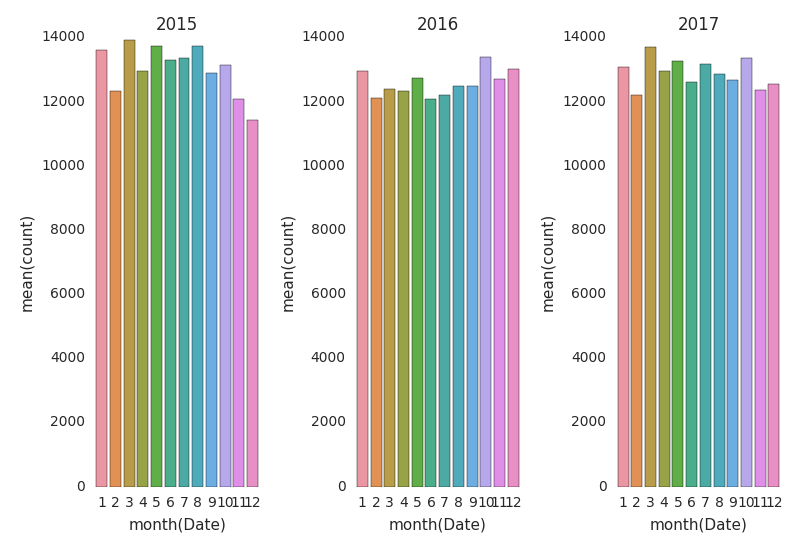

In [0]:
from datetime import datetime
from pyspark.sql.types import DateType
from pyspark.sql.functions import *
timeTrans = udf(lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())
getHour = udf(lambda x: int(x.split(':')[0]),  IntegerType())
d4_ori = df_opt1.withColumn("Date", timeTrans(col('Date')))
d4_ori = d4_ori.withColumn("Time", getHour(col("Time")))
d4_res = d4_ori.filter(year(d4_ori.Date).between(2015, 2017)).groupBy(year(d4_ori.Date), month(d4_ori.Date)).count().orderBy(year(d4_ori.Date), month(d4_ori.Date))
display(d4_res)
d4_2015 = d4_res.filter(d4_res['year(Date)'] == 2015)
d4_2016 = d4_res.filter(d4_res['year(Date)'] == 2016)
d4_2017 = d4_res.filter(d4_res['year(Date)'] == 2017)
y_2015 = d4_2015.toPandas()
y_2016 = d4_2016.toPandas()
y_2017 = d4_2017.toPandas()

fig, axes = plt.subplots(1,3)
sb.barplot(x="month(Date)", y="count",data=y_2015,ax=axes[0])
axes[0].set_title('2015')
sb.barplot(x="month(Date)", y="count",data=y_2016,ax=axes[1])
axes[1].set_title('2016')
sb.barplot(x="month(Date)", y="count",data=y_2017,ax=axes[2])
axes[2].set_title('2017')
plt.tight_layout()
display(fig.show())

In [0]:
q4_result = spark.sql("SELECT SUBSTRING(Date, 7,4) AS Year, SUBSTRING(Date, 0, 2) AS Month, COUNT(*) AS Count FROM sf_crime GROUP BY 1,2 HAVING Year IN (2015,2016,2017,2018) ORDER BY 1,2")
display(q4_result)

Year,Month,Count
2015,01,13606
2015,02,12329
2015,03,13929
2015,04,12959
2015,05,13729
2015,06,13304
2015,07,13365
2015,08,13730
2015,09,12896
2015,10,13147


#### Answer of Q4:
Based on current data retrieved before June 2018, May has the lowest total crime from 2015 to 2018, followed by Feburary.

#### Q5 question (OLAP)
Analysis the number of crime w.r.t(with respect to) the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

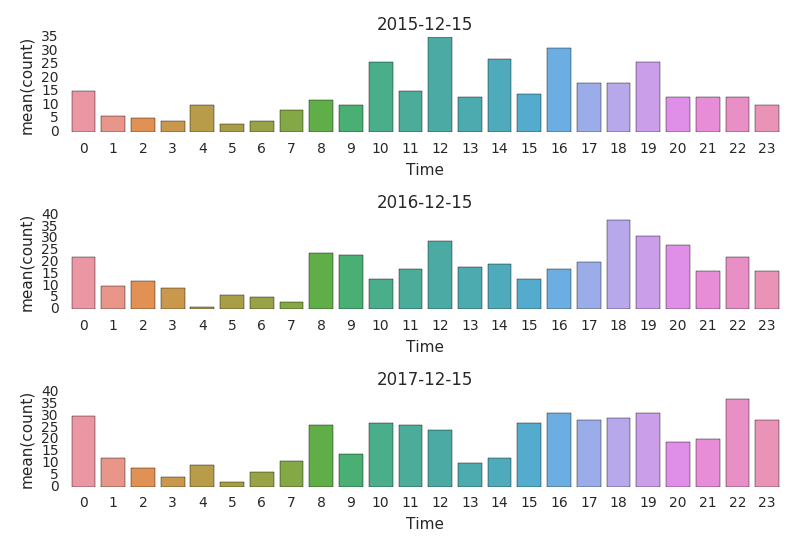

In [0]:
q5_res = d4_ori.filter(col('Date').isin('2015-12-15', '2016-12-15', '2017-12-15')).groupBy('Date', 'Time').count().orderBy('Date', 'Time')
d5_2015 = q5_res.filter(q5_res['Date'] == '2015-12-15')
d5_2016 = q5_res.filter(q5_res['Date'] == '2016-12-15')
d5_2017 = q5_res.filter(q5_res['Date'] == '2017-12-15')
y_2015 = d5_2015.toPandas()
y_2016 = d5_2016.toPandas()
y_2017 = d5_2017.toPandas()

fig, axes = plt.subplots(3,1)
sb.barplot(x="Time", y="count",data=y_2015,ax=axes[0])
axes[0].set_title('2015-12-15')
sb.barplot(x="Time", y="count",data=y_2016,ax=axes[1])
axes[1].set_title('2016-12-15')
sb.barplot(x="Time", y="count",data=y_2017,ax=axes[2])
axes[2].set_title('2017-12-15')
plt.tight_layout()
display(fig.show())

In [0]:
q5_result = spark.sql("SELECT Date, SUBSTRING(Time, 0, 2) AS Hour, INT(COUNT(*)) AS Count FROM sf_crime WHERE Category == 'WARRANTS' GROUP BY Date, Hour HAVING Date IN ('02/19/2015', '02/19/2016', '02/19/2017', '02/19/2018') ORDER BY Hour, SUBSTRING(Date, 7, 4)")
display(q5_result)

Date,Hour,Count
02/19/2015,00,1
02/19/2016,00,3
02/19/2018,00,3
02/19/2016,01,1
02/19/2018,01,1
02/19/2017,02,2
02/19/2018,02,1
02/19/2017,07,2
02/19/2015,08,3
02/19/2016,08,1


#### Answer of Q5
The result indicates that the crime is less likely to happen from 1:00 to 10:00 , and from 13:00 to 14:00.

#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [0]:
top3_danger_drt = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC LIMIT 3")
display(top3_danger_drt)

top3_danger_drt.createOrReplaceTempView("top3_danger_drt")
q6_result = spark.sql("SELECT PdDistrict, SUBSTRING(Time, 0, 2) AS Hour, COUNT(*) AS Count FROM sf_crime WHERE Category == 'WARRANTS' \
AND PdDistrict IN (SELECT PdDistrict FROM top3_danger_drt) GROUP BY PdDistrict, Hour ORDER BY PdDistrict, Hour")
display(q6_result)

PdDistrict,Hour,Count
MISSION,00,677
MISSION,01,506
MISSION,02,413
MISSION,03,268
MISSION,04,205
MISSION,05,149
MISSION,06,299
MISSION,07,516
MISSION,08,629
MISSION,09,669


In [0]:
# From Q2 we know the top3 District are ：【SOUTHERN】，【MISSION】，【NORTHERN】
q6 = d4_ori.filter(col('PdDistrict').isin('SOUTHERN', 'MISSION', 'NORTHERN')).groupBy('PdDistrict', 'Category').count().orderBy('PdDistrict', desc('count'))
display(q6)
q6_2 = d4_ori.filter(col('PdDistrict').isin('SOUTHERN', 'MISSION', 'NORTHERN')).groupBy('PdDistrict', 'Time').count().orderBy('PdDistrict', 'Time')
display(q6_2)

PdDistrict,Time,count
MISSION,0,16797
MISSION,1,11125
MISSION,2,8930
MISSION,3,5599
MISSION,4,3920
MISSION,5,3089
MISSION,6,4791
MISSION,7,7449
MISSION,8,10647
MISSION,9,11453


####Answer of Q6
The result reveals that the Southern district has the highest crime number, followed by Mission and Northern. The time for the occurance of crime is mostly range from 9:00 to 17:00, which is the working hour. Therefore, more police should be distributed to the Sourthern, Mission, and Northern during the working hour.

#### Q7 question (OLAP)
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
from pyspark.sql.types import StringType
def percentage(resolution, total):
  total = float(total)
  resolution = float(resolution)
  percent = round((resolution / total) * 100, 2)
  return str(percent) + '%'
percentage_udf = udf(lambda x, y: percentage(x, y), StringType())
res_per = spark.sql("SELECT res.Category AS Category, res.Resolution, tot.Total FROM ((SELECT Category, COUNT(*) As Resolution FROM sf_crime WHERE Resolution != 'NONE' GROUP BY Category)res LEFT OUTER JOIN (SELECT Category, COUNT(*) AS Total FROM sf_crime GROUP BY Category)tot ON res.Category = tot.Category)")
q7_result = res_per.select('Category', 'Resolution', 'Total', percentage_udf('Resolution', 'Total').alias('Res_percentage')).orderBy('Res_percentage', ascending = False)
display(q7_result)

org.apache.spark.SparkException: Job aborted due to stage failure: Task 6 in stage 195.0 failed 1 times, most recent failure: Lost task 6.0 in stage 195.0 (TID 12803, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 480, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 472, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 456, in dump_stream
 self.serializer.dump_stream(self._batched(iterator), stream)
 File "/databricks/spark/python/pyspark/serializers.py", line 149, in dump_stream
 for obj in iterator:
 File "/databricks/spark/python/pyspark/serializers.py", line 445, in _batched
 for item in iterator:
 File " ", line 1, in 
 File "/databricks/spark/python/pyspark/worker.py", line 87, in 
 return lambda *a: f(*a)
 File "/databricks/spark/python/pyspark/util.py", line 99, in wrapper
 return f(*args, **kwargs)
 File " ", line 7, in 
 File " ", line 5, in percentage
 File "/databricks/spark/python/pyspark/sql/functions.py", line 602, in round
 return Column(sc._jvm.functions.round(_to_java_column(col), scale))
AttributeError: 'NoneType' object has no attribute '_jvm'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:514)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:468)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage6.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:640)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.convert.Wrappers$IteratorWrapper.hasNext(Wrappers.scala:30)
	at com.google.common.collect.Ordering.leastOf(Ordering.java:649)
	at org.apache.spark.util.collection.Utils$.takeOrdered(Utils.scala:37)
	at org.apache.spark.rdd.RDD$$anonfun$takeOrdered$1$$anonfun$30.apply(RDD.scala:1452)
	at org.apache.spark.rdd.RDD$$anonfun$takeOrdered$1$$anonfun$30.apply(RDD.scala:1446)
	at org.apache.spark.SparkContext$$anonfun$40.apply(SparkContext.scala:2340)
	at org.apache.spark.SparkContext$$anonfun$40.apply(SparkContext.scala:2340)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.doRunTask(Task.scala:139)
	at org.apache.spark.scheduler.Task.run(Task.scala:112)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$13.apply(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1526)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:503)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:2355)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:2343)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:2342)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.

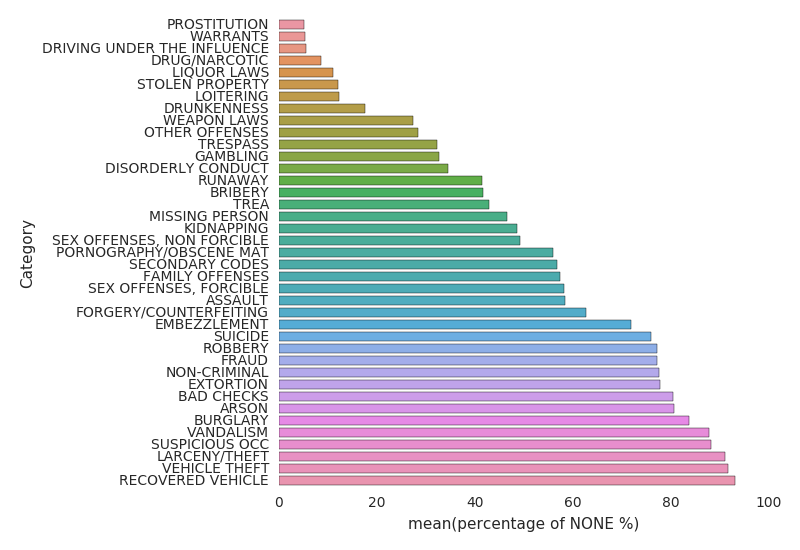

In [0]:
q7 = df_opt1.groupBy('Category', 'Resolution').count().orderBy('Category')
display(q7)
from pyspark.sql.window import Window
q7_1 = q7.withColumn('percentage', col('count')*100/sum('count').over(Window.partitionBy('Category')))
q7_2 = q7_1.withColumn('percentage', col('percentage'))
q7_res = q7_2.filter(q7_2['Resolution'] == 'NONE')
display(q7_res)
q7_res2 = q7_res.select(col('Category'), col('percentage').alias('percentage of NONE %')).orderBy('percentage of NONE %', ascending=True)
qq7 = q7_res2.toPandas()
fig, axes = plt.subplots(1,1)
sb.barplot(x="percentage of NONE %", y="Category",data=qq7,ax=axes)
plt.tight_layout()
display(fig.show())

In [0]:
display(q7_res)

Category,Resolution,count,percentage
ARSON,NONE,3174,80.74281353345205
ASSAULT,NONE,113747,58.42347478607456
BAD CHECKS,NONE,744,80.43243243243244
BRIBERY,NONE,338,41.57441574415744
BURGLARY,NONE,76653,83.7344198901063
DISORDERLY CONDUCT,NONE,3458,34.44223107569721
DRIVING UNDER THE INFLUENCE,NONE,317,5.58885754583921
DRUG/NARCOTIC,NONE,10271,8.58578259270405
DRUNKENNESS,NONE,1725,17.55546509261144
EMBEZZLEMENT,NONE,2147,71.85408299866131


####Answer for Q7:
In this figure, it's easy to find that the category of LACRENY/THEFT, VEHICHLE THFT, RECOVERD VEHICLE has a very low resolution probility, which is alwas happened on the street or some public places. I think the government could set some cctvs in the public places, which deters would-be criminals and will be easy to find back the lost items and the thief.

### Conclusion. 
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. 
More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big  data analysis.  
Point 1:  what is your story ? and why you do this work ?   
Point 2:  how can you do it ?  keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,   
Point 3:  what do you learn from the data ?  keywords: crime, trend, advising, conclusion, runtime

Everyone knows that the crime rate in San Fransisco is very high. I do this work because I want to figure out why this happened. Firstly, I download the data from the open-source wibesite. Due to the dataset is huge, I choose Spark to solve the datas, which is a convenient tool that could use SQL and Python at the same time to process the data. Then, I transform data to the pyspark.dataframe format. I counted the number of crimes for different category to overview the data. To analyse the most danger district, I count the number of crimes in each district by using SQL. Next, I analyse the amount of crimes in every same weekday, each month of 4 years and every certain same day in 3 years. I also analyse the distribution of the crime amount during the day 24 hours. Clustering the spatial distribution of the crime could visualize the degree of safety everywhere in SF, by using matplotlib. Of course, I need to transform the data I need into pandas form